<h1> Convergence of Kalman Filter </h1>
<p> This analyses looks at the convergence of the Kalman Filter implemented in the Hybrid Obstacle Avoidance app. By comparing the sensor readings, filter estimates and the expected true value we can guage how effective the filter was

CSV column data takes the following format from left to right:
<strong>LeftIR, US, RightIR, LeftIR_est, US_est, RightIR_est, velocity</strong>
<p>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scy
import scipy.stats as stats
%matplotlib inline

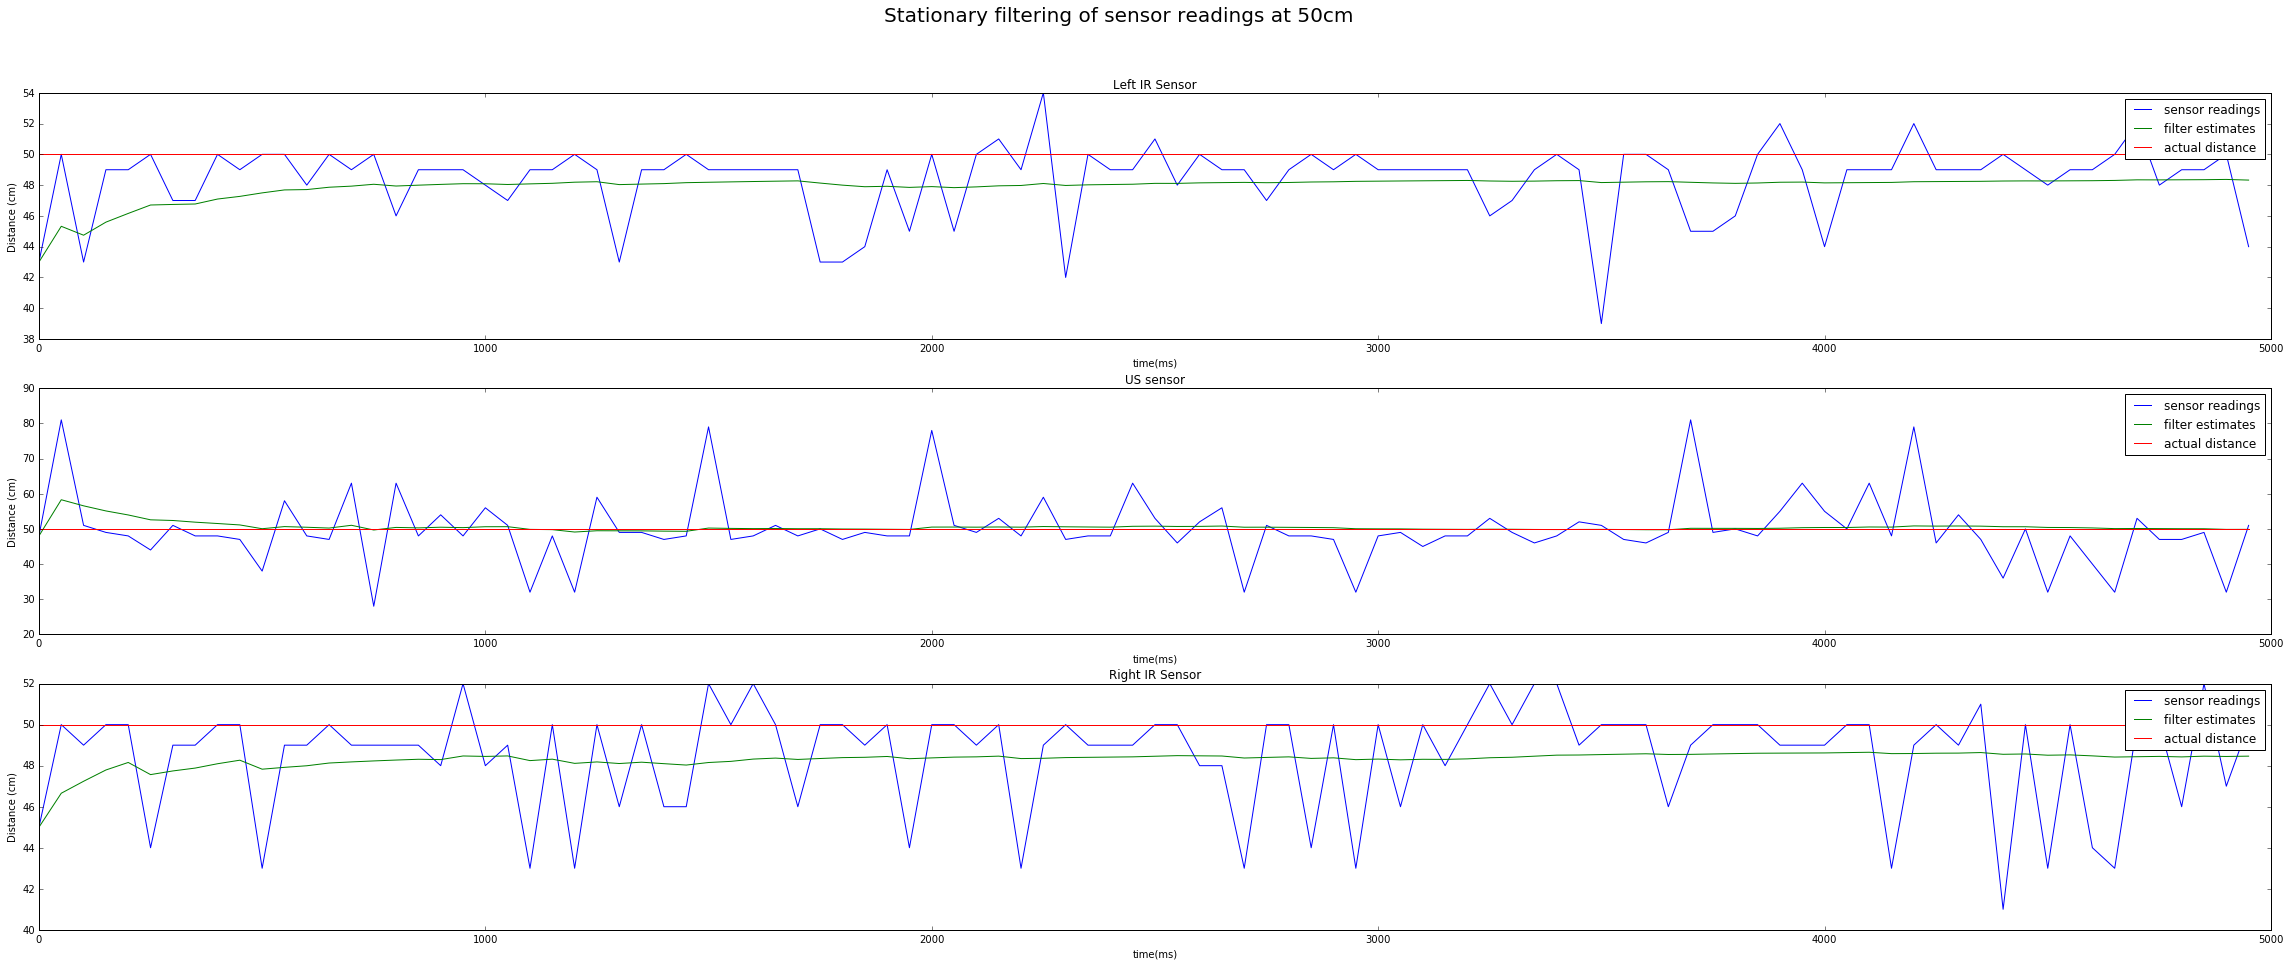

In [97]:
# Kalman Filter at 50cm while stationary
KF_50cm_df = pd.read_csv("50cm.csv", header=None)
KF_50cm_df.columns =["leftIR", "US", "rightIR", "leftIR_est", "US_est", "rightIR_est", "velocity"]
# time starts at 0
# create time series of 50 ms increments for plot
maxtime = KF_50cm_df["leftIR"].count() * 50
time = np.arange(0, maxtime, 50)

fig = plt.figure(figsize=(40,15))
fig.suptitle("Stationary filtering of sensor readings at 50cm\n",fontsize=20)

ax1 = plt.subplot2grid((3,1),(0,0),rowspan=1,colspan=1)
ax1.plot(time[0:100], KF_50cm_df.leftIR[0:100], label='sensor readings')
ax1.plot(time[0:100], KF_50cm_df.leftIR_est[0:100], label='filter estimates')
ax1.plot(time[0:100], [50]*100, label='actual distance')
ax1.legend()

ax1.set_title("Left IR Sensor") 
ax1.set_xlabel("time(ms)")
ax1.set_ylabel("Distance (cm)")

ax2 = plt.subplot2grid((3,1),(1,0),rowspan=1,colspan=1)
ax2.plot(time[0:100], KF_50cm_df.US[0:100], label='sensor readings')
ax2.plot(time[0:100], KF_50cm_df.US_est[0:100], label='filter estimates')
ax2.plot(time[0:100], [50]*100, label='actual distance')
ax2.legend()
ax2.set_title("US sensor") 
ax2.set_xlabel("time(ms)")
ax2.set_ylabel("Distance (cm)")

ax3 = plt.subplot2grid((3,1),(2,0),rowspan=1,colspan=1)
ax3.plot(time[0:100], KF_50cm_df.rightIR[0:100], label='sensor readings')
ax3.plot(time[0:100], KF_50cm_df.rightIR_est[0:100], label='filter estimates')
ax3.plot(time[0:100], [50]*100, label='actual distance')
ax3.legend()
ax3.set_title("Right IR Sensor") 
ax3.set_xlabel("time(ms)")
ax3.set_ylabel("Distance (cm)")




plt.savefig("Kalman Filter Plots/50cm.png")






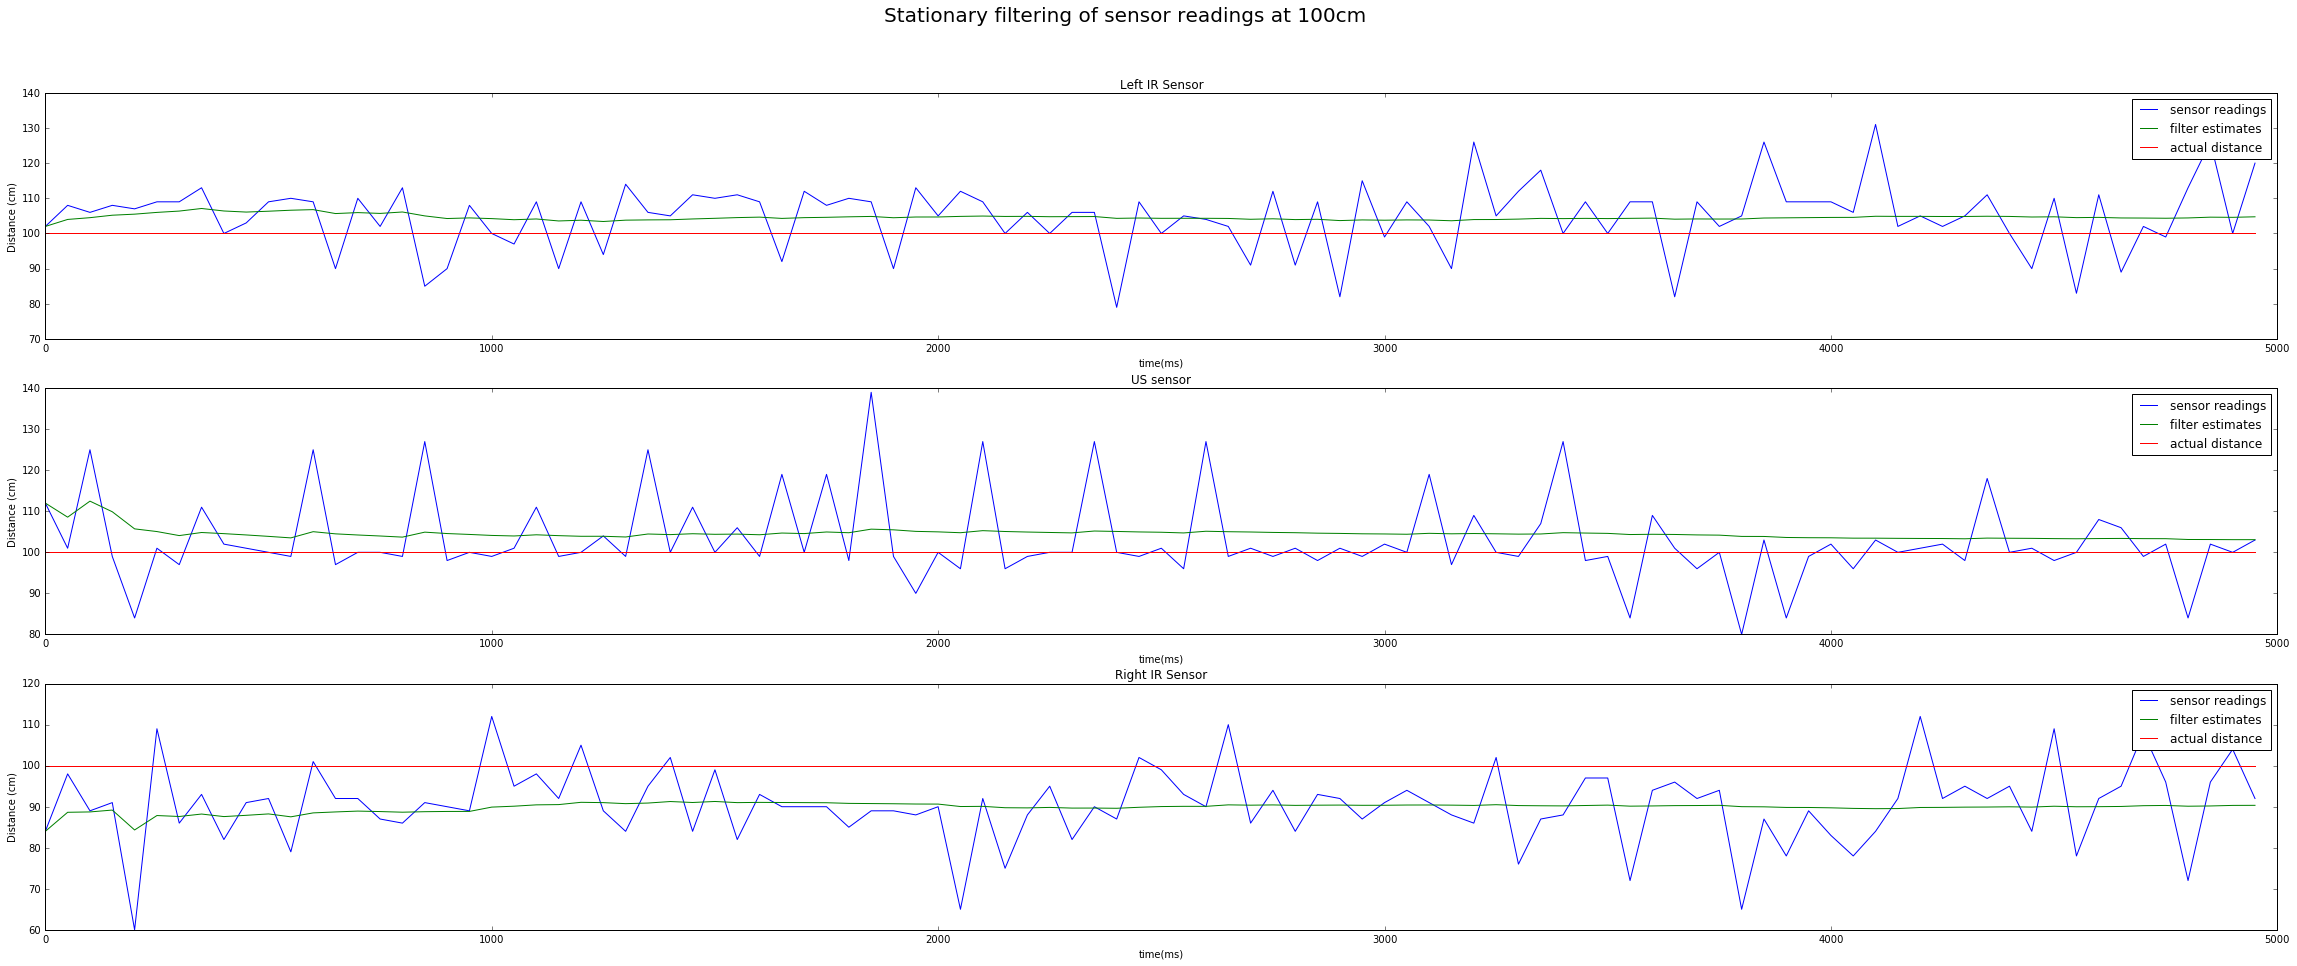

In [98]:
# Kalman Filter at 100cm
KF_100cm_df = pd.read_csv("100cm.csv", header=None)
KF_100cm_df.columns =["leftIR", "US", "rightIR", "leftIR_est", "US_est", "rightIR_est", "velocity"]
# time starts at 0
# create time series of 50 ms increments for plot
maxtime = KF_100cm_df["leftIR"].count() * 50
time = np.arange(0, maxtime, 50)

fig = plt.figure(figsize=(40,15))
fig.suptitle("Stationary filtering of sensor readings at 100cm\n",fontsize=20)

ax1 = plt.subplot2grid((3,1),(0,0),rowspan=1,colspan=1)
ax1.plot(time[0:100], KF_100cm_df.leftIR[0:100], label='sensor readings')
ax1.plot(time[0:100], KF_100cm_df.leftIR_est[0:100], label='filter estimates')
ax1.plot(time[0:100], [100]*100, label='actual distance')
ax1.legend()

ax1.set_title("Left IR Sensor") 
ax1.set_xlabel("time(ms)")
ax1.set_ylabel("Distance (cm)")

ax2 = plt.subplot2grid((3,1),(1,0),rowspan=1,colspan=1)
ax2.plot(time[0:100], KF_100cm_df.US[0:100], label='sensor readings')
ax2.plot(time[0:100], KF_100cm_df.US_est[0:100], label='filter estimates')
ax2.plot(time[0:100], [100]*100, label='actual distance')
ax2.legend()
ax2.set_title("US sensor") 
ax2.set_xlabel("time(ms)")
ax2.set_ylabel("Distance (cm)")

ax3 = plt.subplot2grid((3,1),(2,0),rowspan=1,colspan=1)
ax3.plot(time[0:100], KF_100cm_df.rightIR[0:100], label='sensor readings')
ax3.plot(time[0:100], KF_100cm_df.rightIR_est[0:100], label='filter estimates')
ax3.plot(time[0:100], [100]*100, label='actual distance')
ax3.legend()
ax3.set_title("Right IR Sensor") 
ax3.set_xlabel("time(ms)")
ax3.set_ylabel("Distance (cm)")




plt.savefig("Kalman Filter Plots/100cm.png")



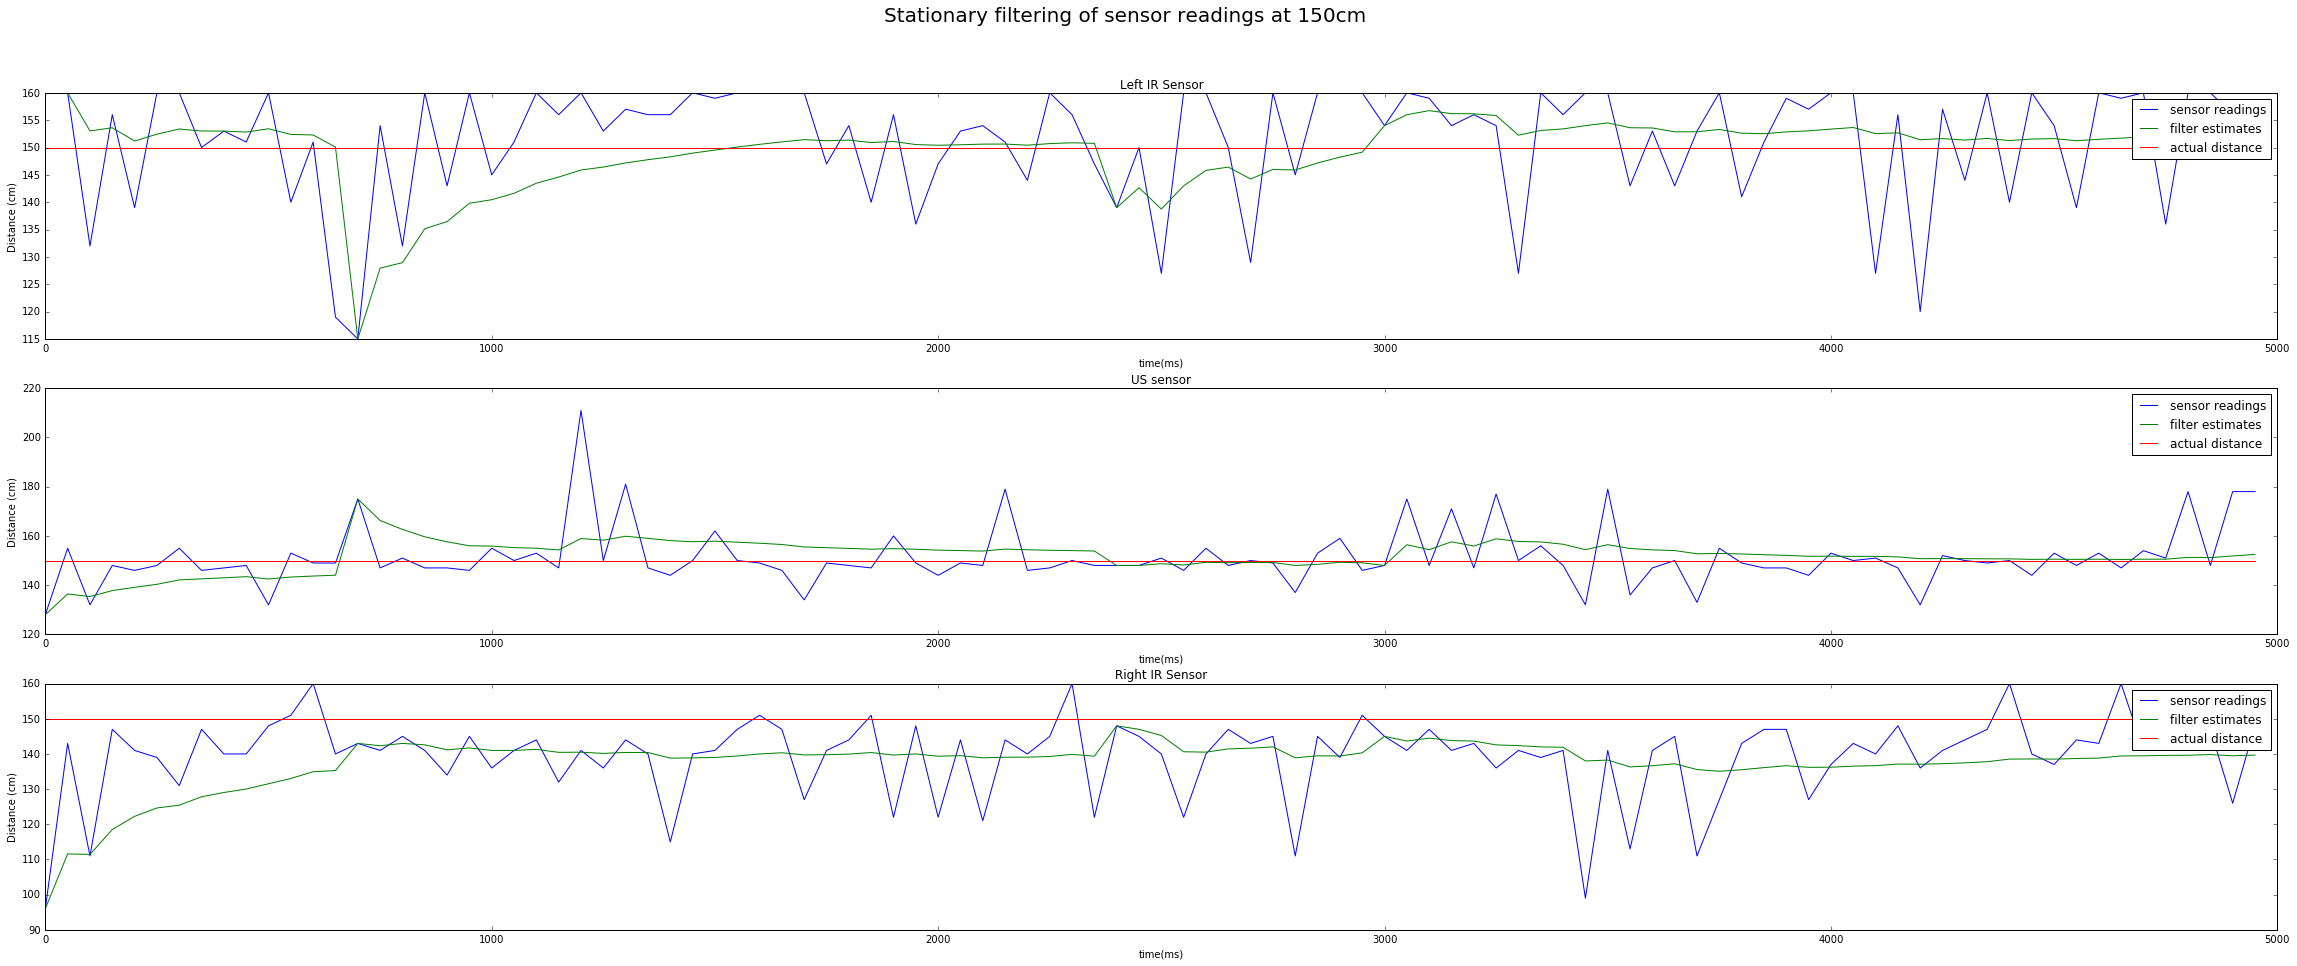

In [99]:
# Kalman Filter at 150cm
KF_150cm_df = pd.read_csv("150cm.csv", header=None)
KF_150cm_df.columns =["leftIR", "US", "rightIR", "leftIR_est", "US_est", "rightIR_est", "velocity"]
# time starts at 0
# create time series of 50 ms increments for plot
maxtime = KF_150cm_df["leftIR"].count() * 50
time = np.arange(0, maxtime, 50)

fig = plt.figure(figsize=(40,15))
fig.suptitle("Stationary filtering of sensor readings at 150cm\n",fontsize=20)

ax1 = plt.subplot2grid((3,1),(0,0),rowspan=1,colspan=1)
ax1.plot(time[0:100], KF_150cm_df.leftIR[0:100], label='sensor readings')
ax1.plot(time[0:100], KF_150cm_df.leftIR_est[0:100], label='filter estimates')
ax1.plot(time[0:100], [150]*100, label='actual distance')
ax1.legend()

ax1.set_title("Left IR Sensor") 
ax1.set_xlabel("time(ms)")
ax1.set_ylabel("Distance (cm)")

ax2 = plt.subplot2grid((3,1),(1,0),rowspan=1,colspan=1)
ax2.plot(time[0:100], KF_150cm_df.US[0:100], label='sensor readings')
ax2.plot(time[0:100], KF_150cm_df.US_est[0:100], label='filter estimates')
ax2.plot(time[0:100], [150]*100, label='actual distance')
ax2.legend()
ax2.set_title("US sensor") 
ax2.set_xlabel("time(ms)")
ax2.set_ylabel("Distance (cm)")

ax3 = plt.subplot2grid((3,1),(2,0),rowspan=1,colspan=1)
ax3.plot(time[0:100], KF_150cm_df.rightIR[0:100], label='sensor readings')
ax3.plot(time[0:100], KF_150cm_df.rightIR_est[0:100], label='filter estimates')
ax3.plot(time[0:100], [150]*100, label='actual distance')
ax3.legend()
ax3.set_title("Right IR Sensor") 
ax3.set_xlabel("time(ms)")
ax3.set_ylabel("Distance (cm)")




plt.savefig("Kalman Filter Plots/150cm.png")



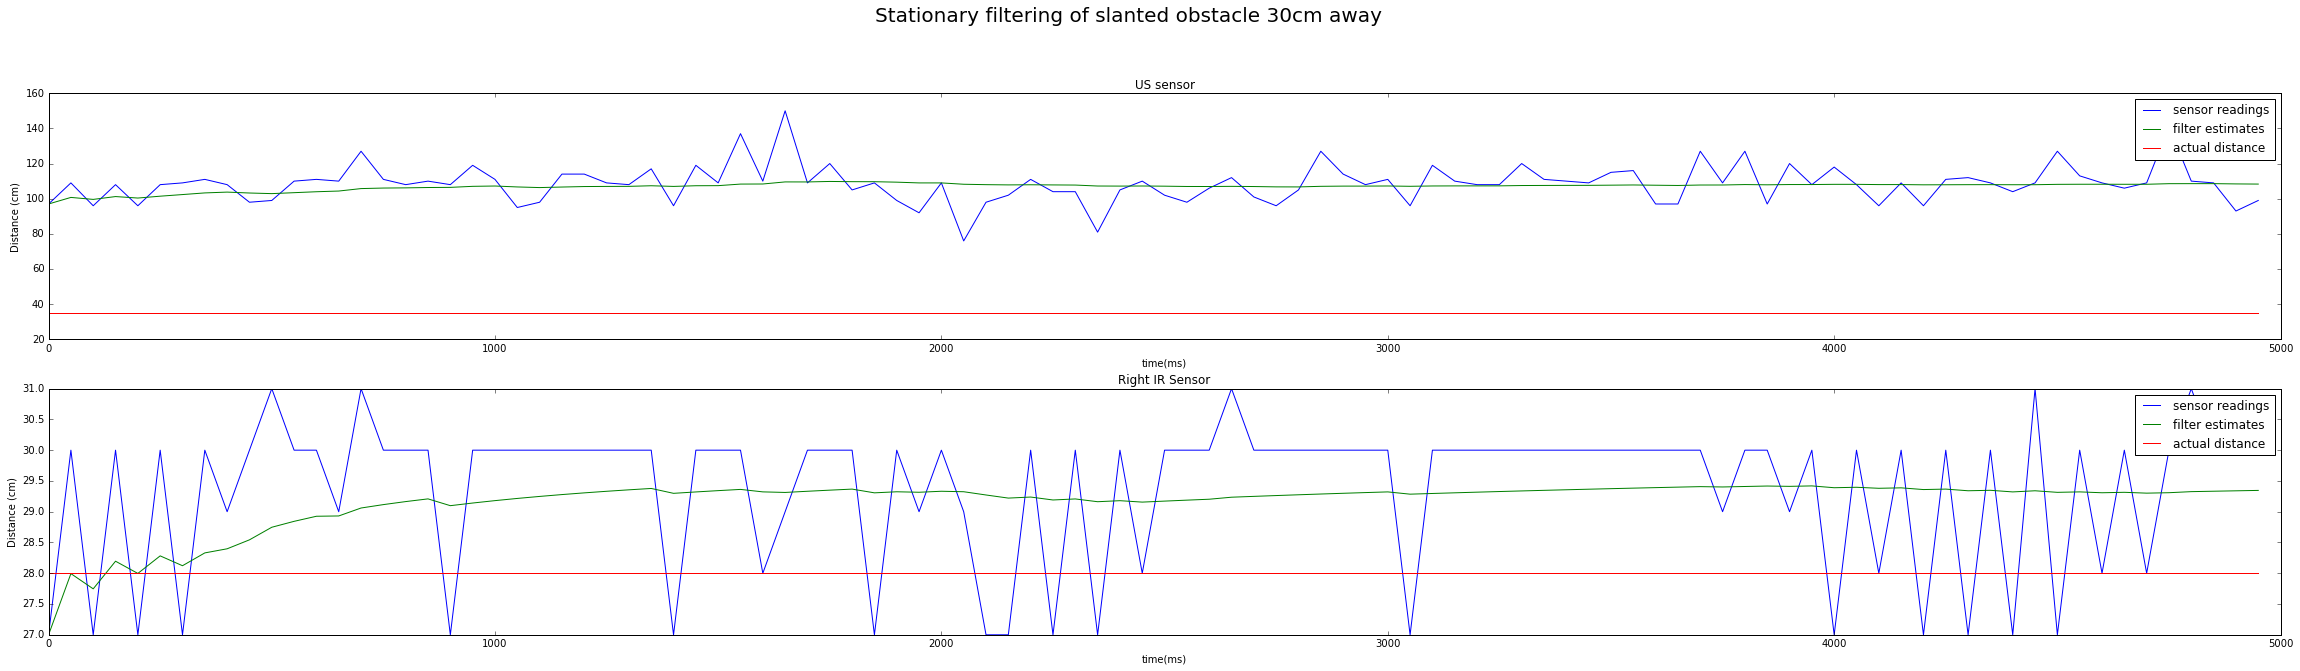

In [100]:
# slanted object placed in front of sensors at approximately 110 degrees
KF_slanted_30cm_df = pd.read_csv("slanted 30cm.csv", header=None)
KF_slanted_30cm_df.columns =["leftIR", "US", "rightIR", "leftIR_est", "US_est", "rightIR_est", "velocity"]
# time starts at 0
# create time series of 50 ms increments for plot
maxtime = KF_slanted_30cm_df["leftIR"].count() * 50
time = np.arange(0, maxtime, 50)

fig = plt.figure(figsize=(40,15))
fig.suptitle("Stationary filtering of slanted obstacle 30cm away\n",fontsize=20)


ax2 = plt.subplot2grid((3,1),(0,0),rowspan=1,colspan=1)
ax2.plot(time[0:100], KF_slanted_30cm_df.US[0:100], label='sensor readings')
ax2.plot(time[0:100], KF_slanted_30cm_df.US_est[0:100], label='filter estimates')
ax2.plot(time[0:100], [35]*100, label='actual distance')
ax2.legend()
ax2.set_title("US sensor") 
ax2.set_xlabel("time(ms)")
ax2.set_ylabel("Distance (cm)")

ax3 = plt.subplot2grid((3,1),(1,0),rowspan=1,colspan=1)
ax3.plot(time[0:100], KF_slanted_30cm_df.rightIR[0:100], label='sensor readings')
ax3.plot(time[0:100], KF_slanted_30cm_df.rightIR_est[0:100], label='filter estimates')
ax3.plot(time[0:100], [28]*100, label='actual distance')
ax3.legend()
ax3.set_title("Right IR Sensor") 
ax3.set_xlabel("time(ms)")
ax3.set_ylabel("Distance (cm)")




plt.savefig("Kalman Filter Plots/slanted_30cm.png")

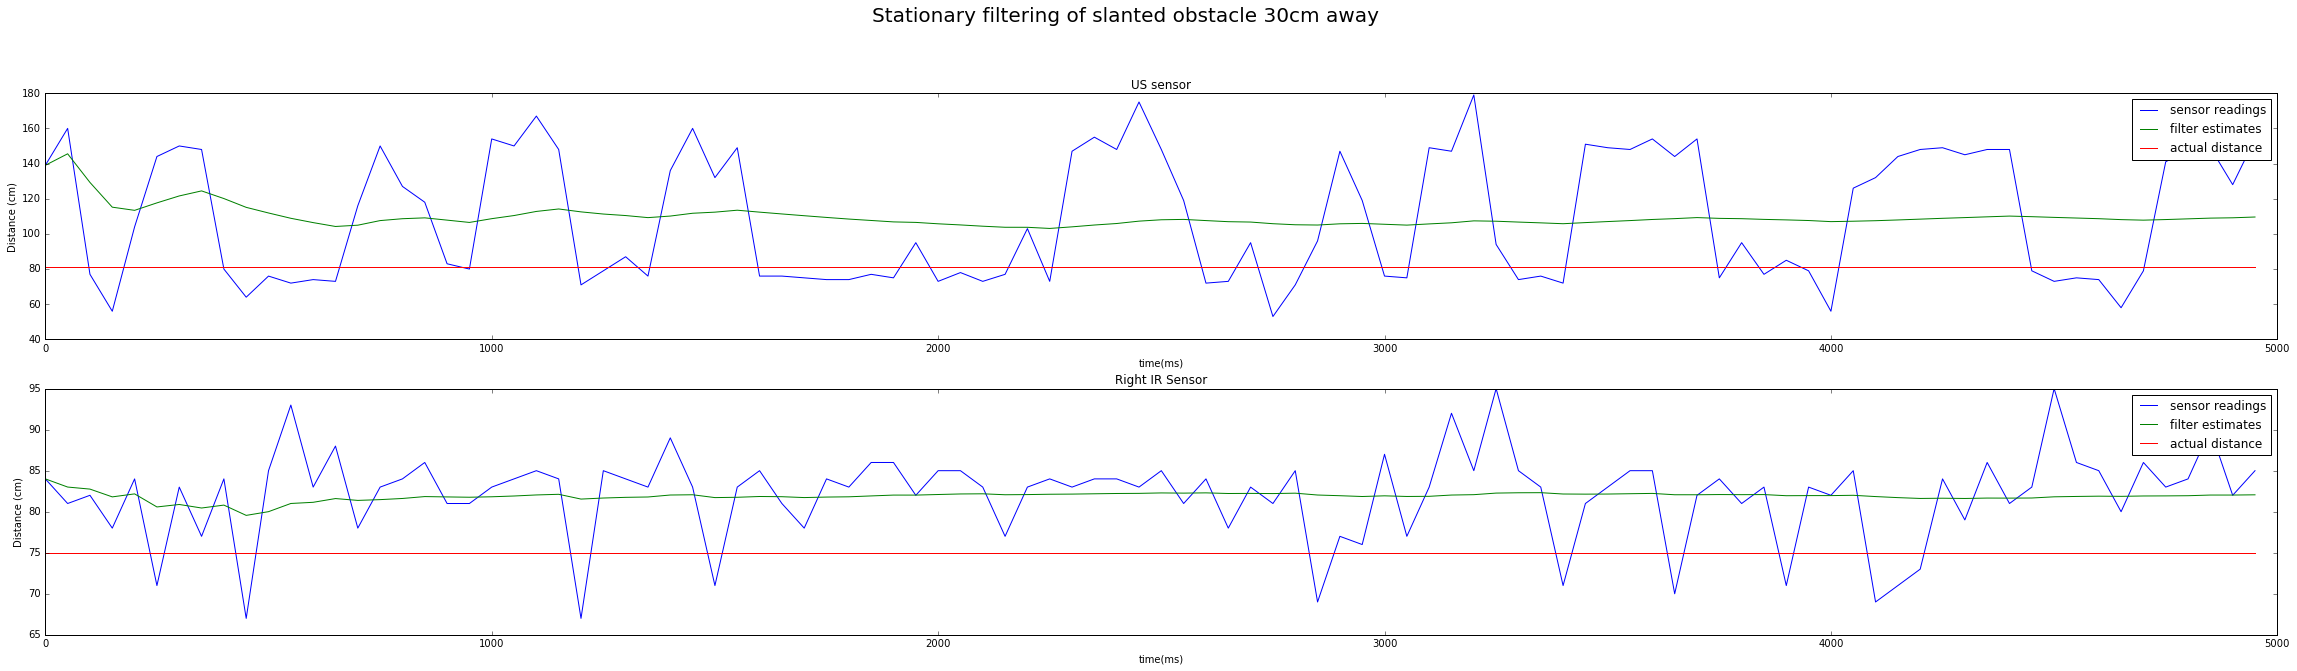

In [101]:
# Stationary filtering of slanted obstacle 70cm away
KF_slanted_70cm_df = pd.read_csv("slanted 70cm.csv", header=None)
KF_slanted_70cm_df.columns =["leftIR", "US", "rightIR", "leftIR_est", "US_est", "rightIR_est", "velocity"]
# time starts at 0
# create time series of 50 ms increments for plot
maxtime = KF_slanted_70cm_df["leftIR"].count() * 50
time = np.arange(0, maxtime, 50)

fig = plt.figure(figsize=(40,15))
fig.suptitle("Stationary filtering of slanted obstacle 30cm away\n",fontsize=20)


ax2 = plt.subplot2grid((3,1),(0,0),rowspan=1,colspan=1)
ax2.plot(time[0:100], KF_slanted_70cm_df.US[0:100], label='sensor readings')
ax2.plot(time[0:100], KF_slanted_70cm_df.US_est[0:100], label='filter estimates')
ax2.plot(time[0:100], [81]*100, label='actual distance')
ax2.legend()
ax2.set_title("US sensor") 
ax2.set_xlabel("time(ms)")
ax2.set_ylabel("Distance (cm)")

ax3 = plt.subplot2grid((3,1),(1,0),rowspan=1,colspan=1)
ax3.plot(time[0:100], KF_slanted_70cm_df.rightIR[0:100], label='sensor readings')
ax3.plot(time[0:100], KF_slanted_70cm_df.rightIR_est[0:100], label='filter estimates')
ax3.plot(time[0:100], [75]*100, label='actual distance')
ax3.legend()
ax3.set_title("Right IR Sensor") 
ax3.set_xlabel("time(ms)")
ax3.set_ylabel("Distance (cm)")




plt.savefig("Kalman Filter Plots/slanted_70cm.png")


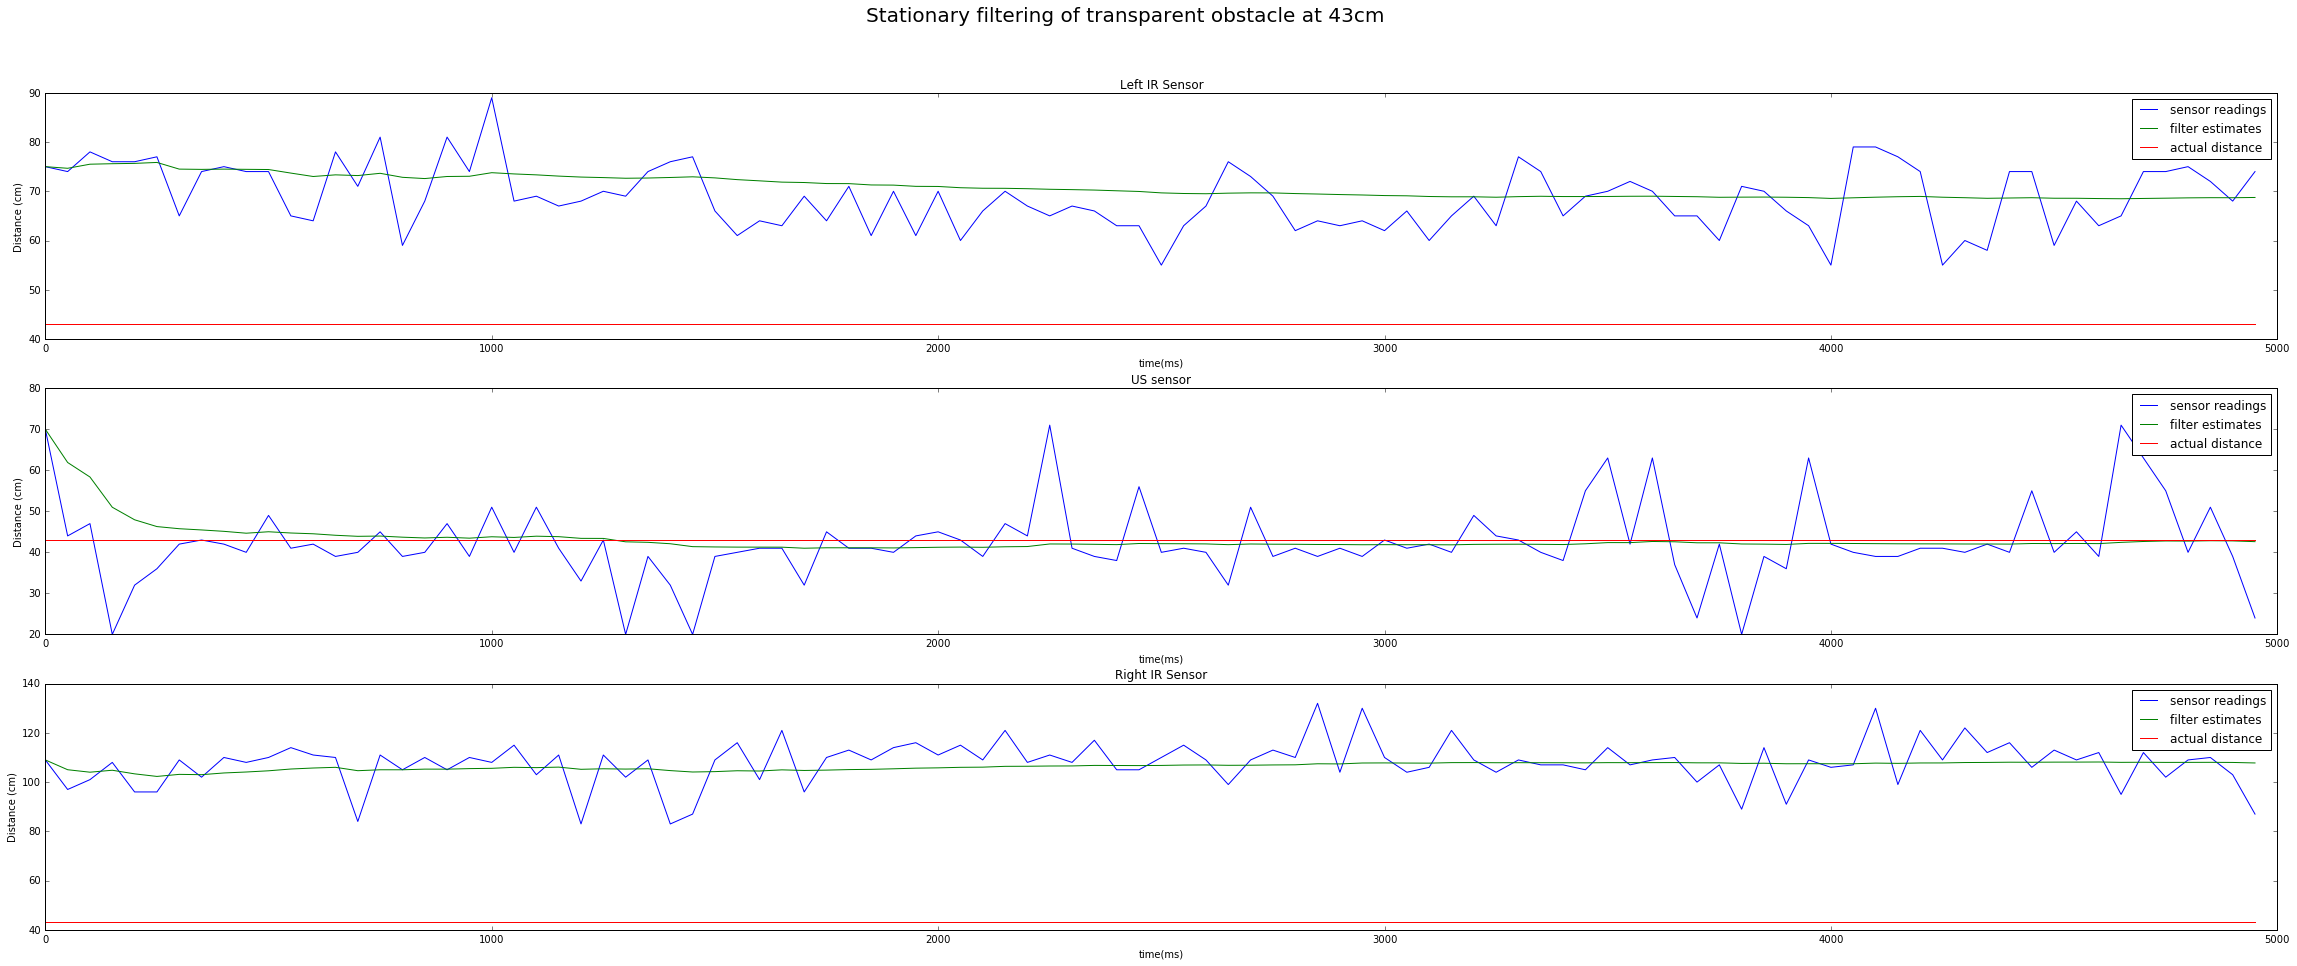

In [102]:
# analysis of KF for transparent obstacle
# creases in cling film perhpas 
KF_transparent_df = pd.read_csv("cling film 43cm.csv", header=None)
KF_transparent_df.columns =["leftIR", "US", "rightIR", "leftIR_est", "US_est", "rightIR_est", "velocity"]
# time starts at 0
# create time series of 50 ms increments for plot
maxtime = KF_transparent_df["leftIR"].count() * 50
time = np.arange(0, maxtime, 50)

fig = plt.figure(figsize=(40,15))
fig.suptitle("Stationary filtering of transparent obstacle at 43cm\n",fontsize=20)

ax1 = plt.subplot2grid((3,1),(0,0),rowspan=1,colspan=1)
ax1.plot(time[0:100], KF_transparent_df.leftIR[0:100], label='sensor readings')
ax1.plot(time[0:100], KF_transparent_df.leftIR_est[0:100], label='filter estimates')
ax1.plot(time[0:100], [43]*100, label='actual distance')
ax1.legend()

ax1.set_title("Left IR Sensor") 
ax1.set_xlabel("time(ms)")
ax1.set_ylabel("Distance (cm)")

ax2 = plt.subplot2grid((3,1),(1,0),rowspan=1,colspan=1)
ax2.plot(time[0:100], KF_transparent_df.US[0:100], label='sensor readings')
ax2.plot(time[0:100], KF_transparent_df.US_est[0:100], label='filter estimates')
ax2.plot(time[0:100], [43]*100, label='actual distance')
ax2.legend()
ax2.set_title("US sensor") 
ax2.set_xlabel("time(ms)")
ax2.set_ylabel("Distance (cm)")

ax3 = plt.subplot2grid((3,1),(2,0),rowspan=1,colspan=1)
ax3.plot(time[0:100], KF_transparent_df.rightIR[0:100], label='sensor readings')
ax3.plot(time[0:100], KF_transparent_df.rightIR_est[0:100], label='filter estimates')
ax3.plot(time[0:100], [43]*100, label='actual distance')
ax3.legend()
ax3.set_title("Right IR Sensor") 
ax3.set_xlabel("time(ms)")
ax3.set_ylabel("Distance (cm)")




plt.savefig("Kalman Filter Plots/KF_transparent.png")

 